In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from PIL import Image
print(tf.__version__)

2.4.1


In [5]:
path='./image_data/'
list_data=listdir(path)
image_set=[]

for filename in list_data:
    img=Image.open(path+filename)
    img=img.convert(mode='L')
    image_set.append(np.asarray(img,dtype=int))
image_set=np.asarray(image_set)
image_set = image_set / 255.0

with open('label.txt') as r:
    labels=[int(line.rstrip('\n')) for line in r.readlines()]
    labels=np.asarray(labels)
train_images,test_images,train_labels,test_labels = train_test_split(image_set,labels,test_size=0.3, shuffle=True, random_state=999)
class_names=['false','true']


In [6]:
print(train_images.shape,test_images.shape,train_labels.shape,test_labels.shape)

(1400, 256, 256) (600, 256, 256) (1400,) (600,)


In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
hist=model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
44/44 [==============================] - 7s 157ms/step - loss: 35.4050 - accuracy: 0.5032
Epoch 2/50
44/44 [==============================] - 7s 150ms/step - loss: 4.0976 - accuracy: 0.4848
Epoch 3/50
44/44 [==============================] - 7s 150ms/step - loss: 1.4482 - accuracy: 0.5556
Epoch 4/50
44/44 [==============================] - 7s 152ms/step - loss: 1.4247 - accuracy: 0.5323
Epoch 5/50
44/44 [==============================] - 7s 151ms/step - loss: 0.9285 - accuracy: 0.6036
Epoch 6/50
44/44 [==============================] - 7s 155ms/step - loss: 0.7709 - accuracy: 0.6770
Epoch 7/50
44/44 [==============================] - 7s 151ms/step - loss: 1.0805 - accuracy: 0.5879
Epoch 8/50
44/44 [==============================] - 7s 150ms/step - loss: 0.6431 - accuracy: 0.6981
Epoch 9/50
44/44 [==============================] - 7s 152ms/step - loss: 0.4944 - accuracy: 0.7448
Epoch 10/50
44/44 [==============================] - 7s 150ms/step - loss: 0.5399 - accuracy: 0.716

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

19/19 - 0s - loss: 0.7609 - accuracy: 0.6083

테스트 정확도: 0.6083333492279053


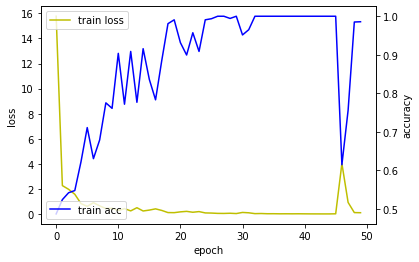

In [56]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()


In [57]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

1

In [61]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

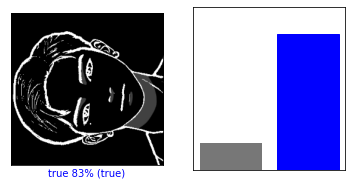

In [62]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

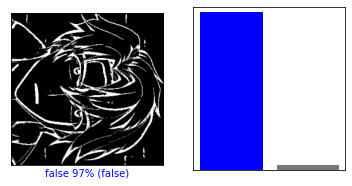

In [63]:
i = 250
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()